## Data Prep

In [2]:
import yfinance as yf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set default seaborn figure size
sns.axes_style(rc={'figure.figsize': (10, 5)})

# ==== Marcos
SYMBOL = "IBIT"

# =====
# Fetch [SYMBOL] data with a 1-minute interval
df = yf.download(SYMBOL, interval="1m", period="1d")

df['LR'] = np.log(df['Close'] / df['Open'])
df['dLR'] = np.log(df['Close'] / df['Open']).diff()

# Display the fetched data
df.dropna(inplace=True)
df.reset_index(inplace=True)

df['Date'] = df['Datetime'].dt.date

df.head()

[*********************100%***********************]  1 of 1 completed


Price,Datetime,Close,High,Low,Open,Volume,LR,dLR,Date
Ticker,,BTXX.AX,BTXX.AX,BTXX.AX,BTXX.AX,BTXX.AX,,,
0,2025-01-09 23:52:00+00:00,33.520000,33.520000,33.520000,33.520000,32,0.000000,0.000000,2025-01-09
1,2025-01-10 00:02:00+00:00,33.599998,33.599998,33.599998,33.599998,23,0.000000,0.000000,2025-01-10
2,2025-01-10 00:24:00+00:00,33.639999,33.639999,33.639999,33.639999,89,0.000000,0.000000,2025-01-10
3,2025-01-10 00:42:00+00:00,33.709999,33.709999,33.709999,33.709999,3,0.000000,0.000000,2025-01-10
4,2025-01-10 01:06:00+00:00,33.730000,33.730000,33.650002,33.650002,106,0.002375,0.002375,2025-01-10


In [731]:
df['sigma'] = df['dLR'].map(abs)

In [732]:
windows = range(5, 35, 5)
for w in windows:

    df[f'LR_ema{w}'] = df.groupby('Date')[f'LR'].ewm(alpha=w/30).mean().reset_index()['LR']
    
    df[f'LR{w}'] = df.groupby('Date')[f'LR'].rolling(w, closed='left').mean().reset_index()['LR']
    df[f'sigma{w}'] = df.groupby('Date')[f'sigma'].rolling(w, closed='left').mean().reset_index()['sigma']

    
    df[f'relative_LR{w}'] = (df[f'LR_ema{w}'] - df[f'LR{w}']) / df[f'sigma{w}']


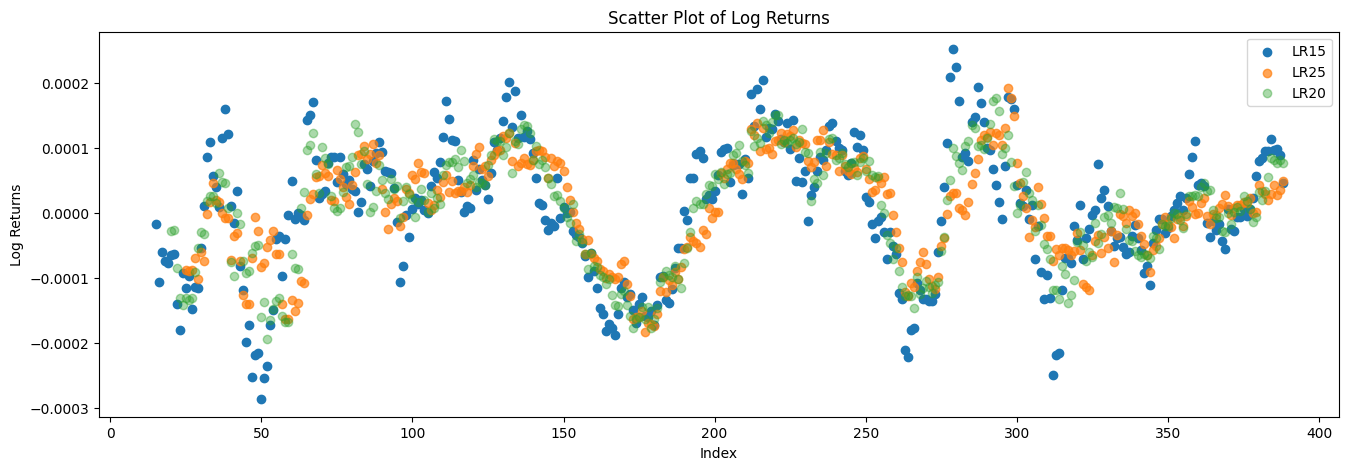

In [733]:
plt.figure(figsize=(16, 5))  # Set the plot width to 16
plt.scatter(df.index, df['LR15'], alpha=1, label='LR15')
plt.scatter(df.index, df['LR25'], alpha=0.7, label='LR25')
plt.scatter(df.index, df['LR20'], alpha=0.4, label='LR20')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Log Returns')
plt.title('Scatter Plot of Log Returns')
plt.show()

In [734]:
filtered_df = df[(df['LR15'] < df['LR25']) & (df['LR25'] < df['LR20']) | (df['LR15'] > df['LR25']) & (df['LR25'] > df['LR20'])].copy()
filtered_df

# plt.figure(figsize=(16, 5))  # Set the plot width to 16
# plt.scatter(filtered_df.index, filtered_df['LR15'], alpha=1, label='LR15')
# plt.scatter(filtered_df.index, filtered_df['LR25'], alpha=0.7, label='LR25')
# plt.scatter(filtered_df.index, filtered_df['LR20'], alpha=0.4, label='LR20')
# plt.legend()
# plt.xlabel('Index')
# plt.ylabel('Log Returns')
# plt.title('Scatter Plot of Log Returns')
# plt.show()

Price,Datetime,Close,High,Low,Open,Volume,LR,dLR,Date,sigma,...,sigma20,relative_LR20,LR_ema25,LR25,sigma25,relative_LR25,LR_ema30,LR30,sigma30,relative_LR30
Ticker,,SPY,SPY,SPY,SPY,SPY,,,,,...,,,,,,,,,,
29,2025-01-08 15:00:00+00:00,587.820007,587.840027,587.119995,587.299988,118657,0.000885,0.000842,2025-01-08,0.000842,...,0.000712,0.949717,0.000752,-1.020427e-04,0.000709,1.205030,0.000885,NaN,NaN,NaN
34,2025-01-08 15:05:00+00:00,588.430115,588.590027,588.239990,588.580017,93699,-0.000255,-0.000289,2025-01-08,0.000289,...,0.000821,-0.178554,-0.000200,4.593994e-05,0.000724,-0.339358,-0.000255,-0.000010,0.000720,-0.339825
35,2025-01-08 15:06:00+00:00,588.429993,588.549988,588.090088,588.429993,58153,0.000000,0.000255,2025-01-08,0.000255,...,0.000831,-0.065991,-0.000033,2.009341e-05,0.000692,-0.077139,0.000000,-0.000013,0.000695,0.018738
36,2025-01-08 15:07:00+00:00,588.270020,588.539978,588.039978,588.429993,91779,-0.000272,-0.000272,2025-01-08,0.000272,...,0.000800,-0.319027,-0.000232,1.635035e-05,0.000691,-0.359799,-0.000272,-0.000027,0.000684,-0.358014
40,2025-01-08 15:11:00+00:00,587.419983,587.710022,587.260010,587.419983,166985,0.000000,0.001633,2025-01-08,0.001633,...,0.000766,-0.381620,-0.000227,-7.208163e-05,0.000766,-0.201792,0.000000,-0.000053,0.000661,0.080111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2025-01-08 20:49:00+00:00,588.919983,588.960022,588.815002,588.859985,82820,0.000102,0.000270,2025-01-08,0.000270,...,0.000307,0.138794,0.000061,3.859545e-07,0.000299,0.202331,0.000102,0.000004,0.000296,0.330738
379,2025-01-08 20:50:00+00:00,589.320007,589.419983,588.890015,588.909973,499416,0.000696,0.000594,2025-01-08,0.000594,...,0.000307,1.563161,0.000590,1.240661e-06,0.000297,1.983172,0.000696,0.000010,0.000288,2.379222
380,2025-01-08 20:51:00+00:00,589.239990,589.400024,589.059998,589.320007,325393,-0.000136,-0.000832,2025-01-08,0.000832,...,0.000336,0.106108,-0.000015,4.334539e-05,0.000303,-0.191738,-0.000136,0.000033,0.000306,-0.551302


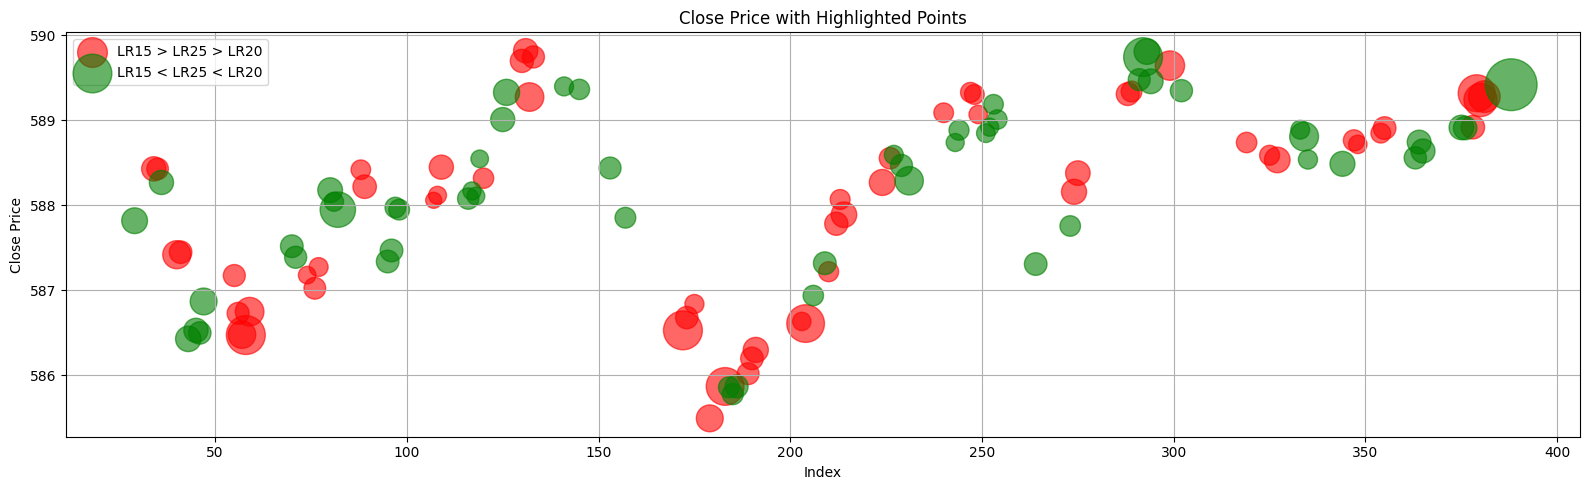

In [735]:
plt.figure(figsize=(16, 5))  # Set the plot width to 16
highlight_red = (df['LR15'] > df['LR25']) & (df['LR25'] > df['LR20'])
highlight_green = (df['LR15'] < df['LR25']) & (df['LR25'] < df['LR20'])
plt.scatter(df.index[highlight_red], df['Close'][highlight_red], 
            color='red', label='LR15 > LR25 > LR20', 
            s=df['Volume']['SPY'][highlight_red].map(np.sqrt), alpha=0.6)  # Size based on volume
plt.scatter(df.index[highlight_green], df['Close'][highlight_green], 
            color='green', label='LR15 < LR25 < LR20', 
            s=df['Volume']['SPY'][highlight_green].map(np.sqrt), alpha=0.6)  # Size based on volume
plt.legend()
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close Price with Highlighted Points')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()

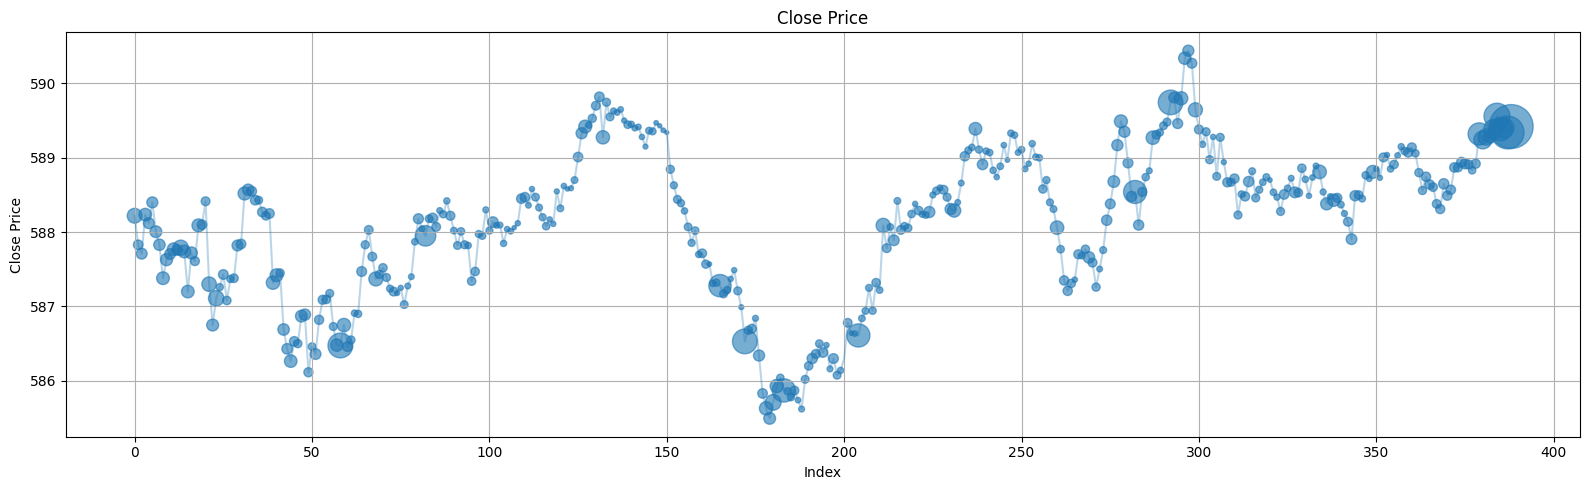

In [736]:
plt.figure(figsize=(16, 5))  # Set the plot width to 16
plt.plot(df.index, df['Close'], 
         alpha=0.3)  # Line plot for Close Price
plt.scatter(df.index, df['Close'], 
            s=(df['Volume']['SPY'] / df['Volume']['SPY'].max()) * 1000, alpha=0.6)  # Size based on volume
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close Price')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()

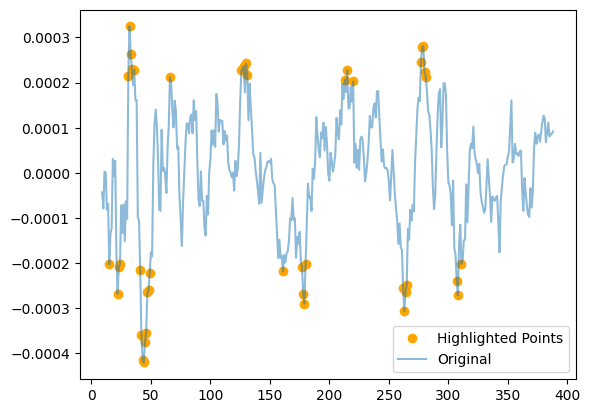

In [737]:
a = 0.0002
t = (df['LR'] * (df['Volume']['SPY']+0.001).map(np.log))
f = (t.rolling(10).sum() / (df['Volume']['SPY']+0.001).map(np.log).rolling(10).sum())
highlighted_points = (f > a) | (f < -a)  # Highlight points above 0.00015 or below -0.00015
f[highlighted_points].plot(style='o', label='Highlighted Points', color='orange')  # Plot highlighted points
f.plot(label='Original', alpha=0.5)  # Plot original data for reference
plt.legend()


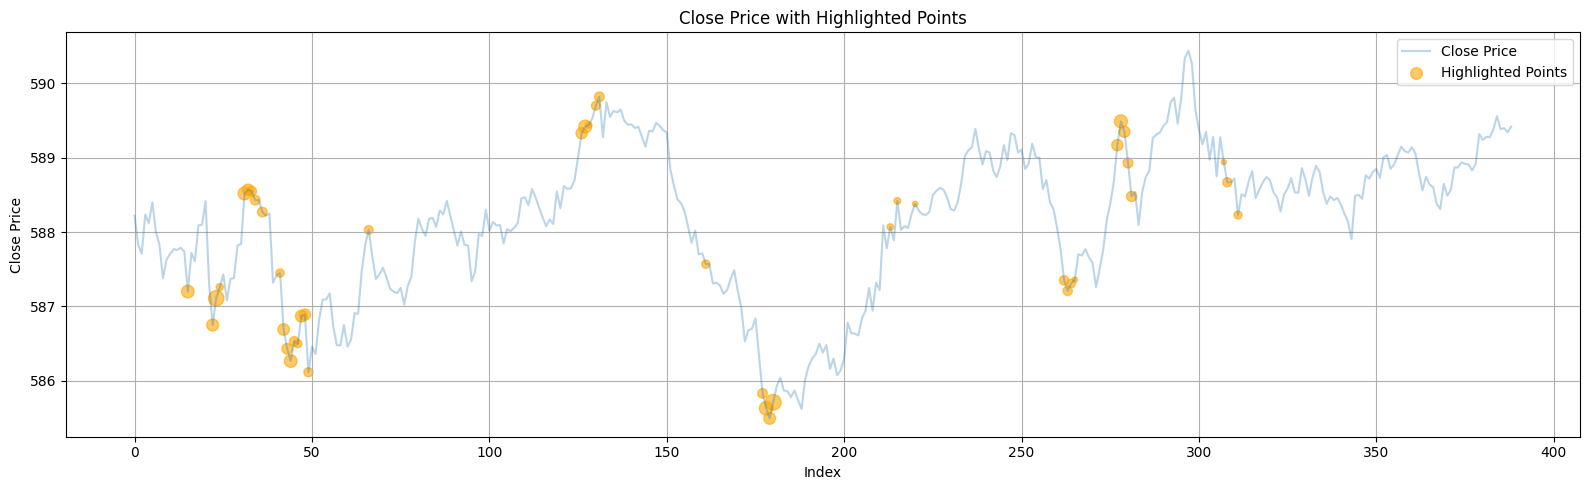

In [738]:
plt.figure(figsize=(16, 5))  # Set the plot width to 16
plt.plot(df.index, df['Close'], alpha=0.3, label='Close Price')  # Line plot for Close Price
plt.scatter(df.index[highlighted_points], df['Close'][highlighted_points], 
            color='orange', label='Highlighted Points', 
            s=(df['Volume']['SPY'][highlighted_points] / df['Volume']['SPY'].max()) * 1000, alpha=0.6)  # Size based on volume
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close Price with Highlighted Points')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()


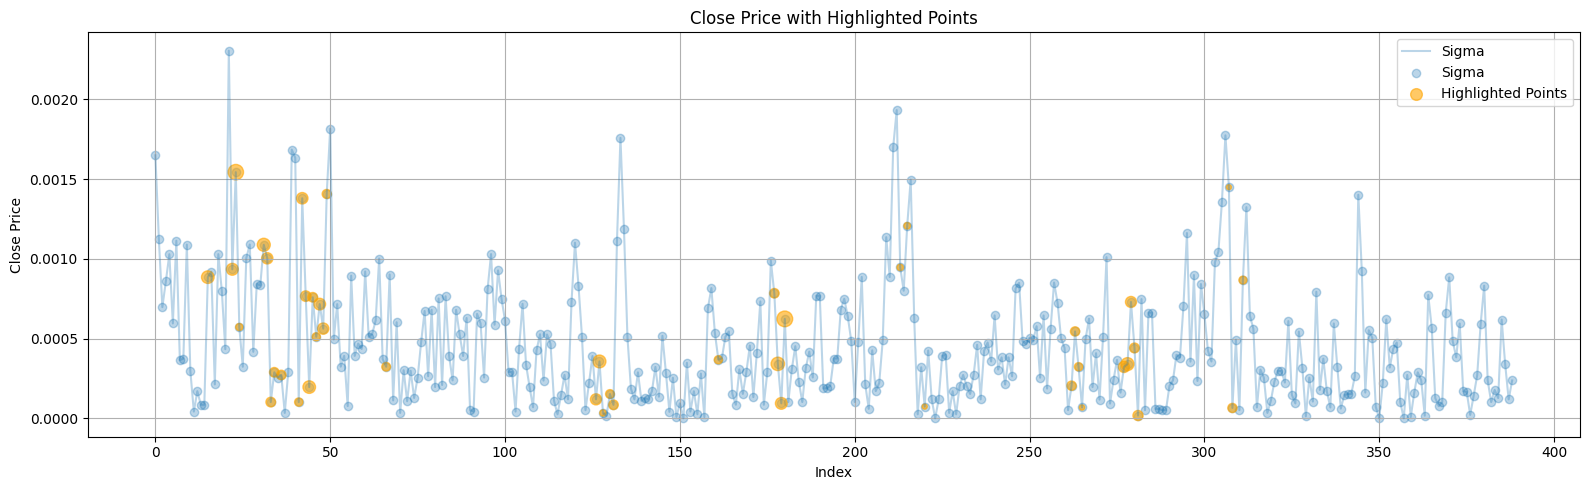

In [739]:
plt.figure(figsize=(16, 5))  # Set the plot width to 16
plt.plot(df.index, df['sigma'], alpha=0.3, label='Sigma')  # Line plot for Close Price
plt.scatter(df.index, df['sigma'], alpha=0.3, label='Sigma')  # Line plot for Close Price
plt.scatter(df.index[highlighted_points], df['sigma'][highlighted_points], 
            color='orange', label='Highlighted Points', 
            s=(df['Volume']['SPY'][highlighted_points] / df['Volume']['SPY'].max()) * 1000, alpha=0.6)  # Size based on volume
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close Price with Highlighted Points')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()


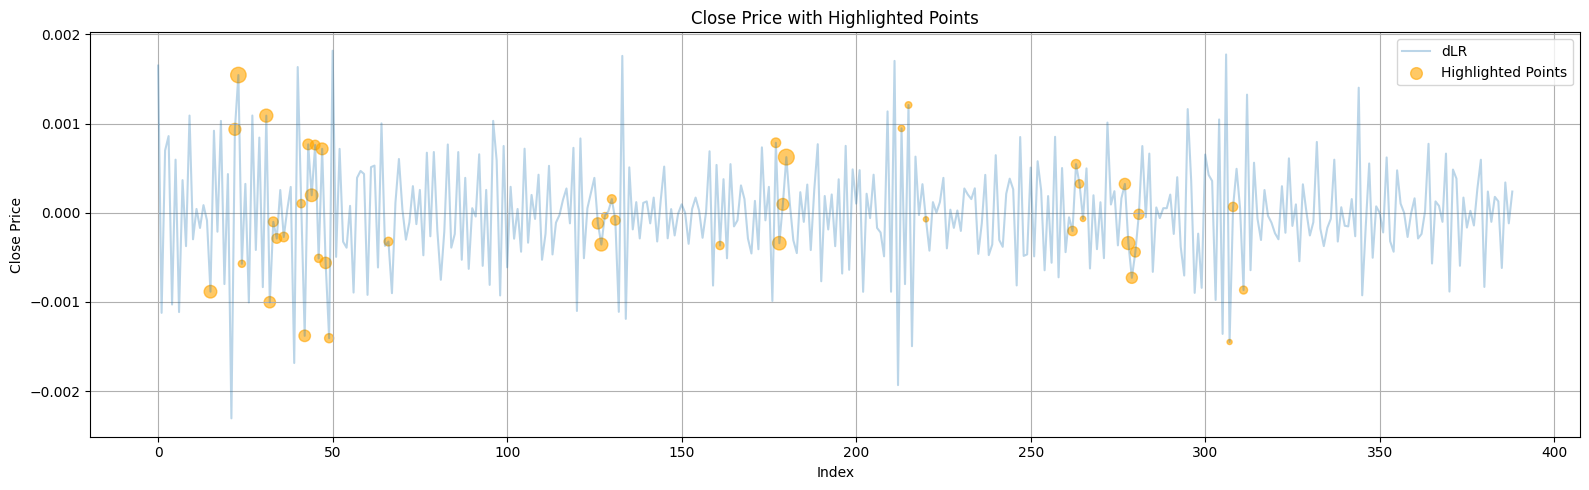

In [740]:
plt.figure(figsize=(16, 5))  # Set the plot width to 16
plt.plot(df.index, df['dLR'], alpha=0.3, label='dLR')  # Line plot for Close Price
plt.scatter(df.index[highlighted_points], df['dLR'][highlighted_points], 
            color='orange', label='Highlighted Points', 
            s=(df['Volume']['SPY'][highlighted_points] / df['Volume']['SPY'].max()) * 1000, alpha=0.6)  # Size based on volume
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close Price with Highlighted Points')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()
